# Stable Diffusion 1.5 using torch.compile with OpenVINO backend

In [1]:
import sys

In [2]:
import torch
from diffusers import StableDiffusionPipeline
import openvino.frontend.pytorch.torchdynamo.backend
import time
import os

In [3]:
import warnings
warnings.filterwarnings("ignore")

### Using SD model on CPU/GPU with `StableDiffusionPipeline`
[back to top ⬆️](#Table-of-contents:)

In [5]:
generator = torch.Generator("cpu").manual_seed(1024)
model_id = "runwayml/stable-diffusion-v1-5"
pipe = StableDiffusionPipeline.from_pretrained(model_id, torch_dtype=torch.float16)
pipe.unet = torch.compile(pipe.unet, backend="openvino", options = {"device" : "GPU"}) #CPU,GPU
pipe.vae.decode = torch.compile(pipe.vae.decode, backend="openvino", options = {"device" : "GPU"}) #CPU,GPU    

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

Time taken:  11.101668357849121


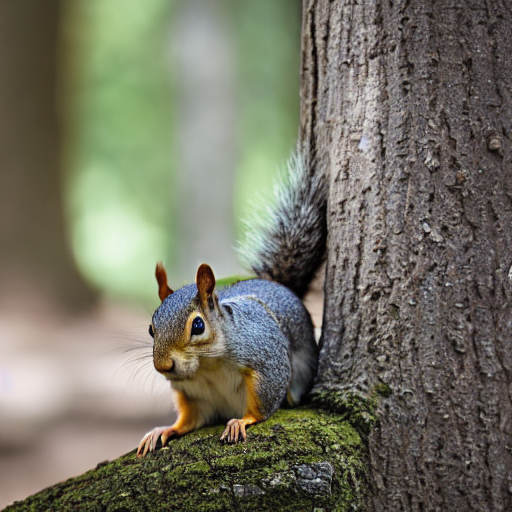

In [7]:
prompt = "A cute squirrel in the forest, portrait, 8k"
start_time = time.time()
image = pipe(prompt, num_inference_steps=50, generator=generator).images[0]
end_time = time.time()
print("Time taken: ", end_time - start_time)   
image